In [17]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from typing import Union
tf.__version__

'1.14.0'

In [18]:
from tensorflow.examples.tutorials.mnist import input_data

In [19]:
def plot_histogram(weights_list: list,
                   image_name: str,
                   include_zeros=True):

    """A function to plot weights distribution"""

    weights = []
    for w in weights_list:
        weights.extend(list(w.ravel()))

    if not include_zeros:
        weights = [w for w in weights if w != 0]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    ax.hist(weights,
            bins=100,
            facecolor='green',
            edgecolor='black',
            alpha=0.7,
            range=(-0.3, 0.3))

    ax.set_title('Weights distribution')
    ax.set_xlabel('Weights values')
    ax.set_ylabel('Number of weights')
    
    plt.show()

    fig.savefig(image_name + '.png')
    
def number_of_parameters(var_list):
    return sum(np.prod(v.get_shape().as_list()) for v in var_list)

def mask_for_big_values(weights, pruning_threshold):

    small_weights = np.abs(weights) < pruning_threshold
    return np.logical_not(small_weights)


In [20]:
def _apply_prune_on_grads(grads_and_vars: list,threshold: float):

        # we need to make gradients correspondent
        # to the pruned weights to be zero

    grads_and_vars_sparse = []

    for grad, var in grads_and_vars:
        if 'weights' in var.name:
            small_weights = tf.greater(threshold, tf.abs(var))
            mask = tf.cast(tf.logical_not(small_weights), tf.float32)
            grad = grad * mask

        grads_and_vars_sparse.append((grad, var))
               
    return grads_and_vars_sparse

def _create_optimizer_sparse(loss: tf.Tensor,
                                 threshold: float,
                                 learning_rate: Union[tf.Tensor, float],
                                 momentum: Union[tf.Tensor, float]) -> tf.Operation:

    with tf.variable_scope('optimizer'):

        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                                   momentum=momentum,
                                                   name='optimizer')
        self.global_step = tf.Variable(0)
        grads_and_vars = optimizer.compute_gradients(loss)
        grads_and_vars_sparse = self._apply_prune_on_grads(grads_and_vars,
                                                               threshold)
        train_op = optimizer.apply_gradients(grads_and_vars_sparse,
                                                 global_step=self.global_step,
                                                 name='train_op')

        return train_op

In [21]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Number of parameters (four bytes == 1 parameter): 2468826.

Weighs before training
(784, 1568)
[[ 0.00954777  0.00963113 -0.00465078 ... -0.00183627  0.0001129
  -0.00458156]
 [-0.01121794 -0.01542681 -0.00250259 ... -0.00336521 -0.01654753
  -0.0106645 ]
 [-0.03485266 -0.00534887 -0.0089251  ...  0.01477737 -0.00322848
  -0.01313579]
 ...
 [ 0.00306279 -0.02836447  0.01821861 ...  0.01621291 -0.00289119
  -0.00011845]
 [-0.00552392  0.00501846 -0.00682143 ...  0.01671015  0.0096703
  -0.02337783]
 [-0.00362628 -0.00779362  0.00819597 ... -0.00486135  0.0210181
   0.01171743]]
(1568, 784)
[[-0.00591536  0.0178489   0.00665656 ... -0.01846121  0.0038529
  -0.02218676]
 [-0.00425267 -0.00603293  0.00245944 ... -0.01415663 -0.00284738
   0.00330582]
 [-0.0022457   0.0143121   0.0043769  ...  0.00408652 -0.01004895
   0.00787971]
 ...
 [-0.02701725  0.00976309 -0.0014384  ... -0.00680479  0.00540023
   0.01403584]
 [-0.00274776 -0.00178698 -0.00089821 ... -0.01133501  0.00523145
  -0.01292

acc 0.0984
epoch: 1
train acc: 0.96034545 acc 0.9567
epoch: 2
train acc: 0.9612 acc 0.9563
epoch: 3
train acc: 0.94796365 acc 0.9448
epoch: 4
train acc: 0.9346182 acc 0.9363
epoch: 5
train acc: 0.8946364 acc 0.899
---------------------------------------------------


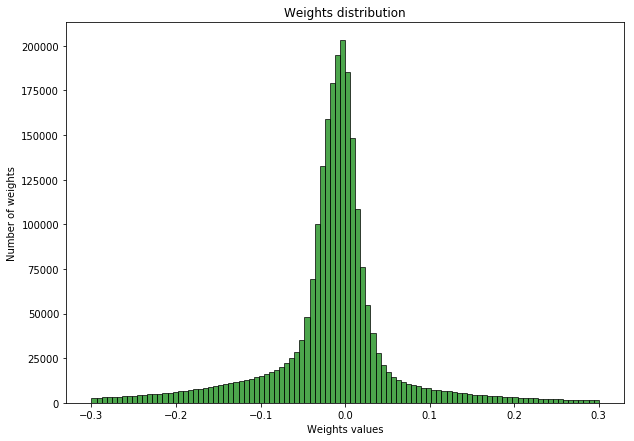

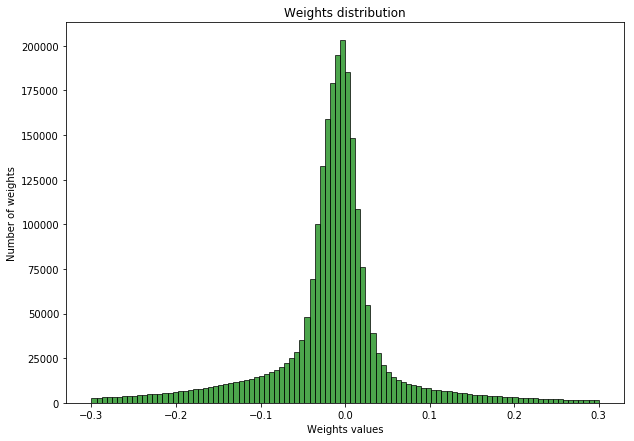

---------------------------------------------------
after pruning----------------------------------------------------------
(784, 1568)
[[ 0.00954777  0.00963113 -0.00465078 ... -0.00183627  0.0001129
  -0.00458156]
 [-0.01121794 -0.01542681 -0.00250259 ... -0.00336521 -0.01654753
  -0.0106645 ]
 [-0.03485266 -0.00534887 -0.0089251  ...  0.01477737 -0.00322848
  -0.01313579]
 ...
 [ 0.00306279 -0.02836447  0.01821861 ...  0.01621291 -0.00289119
  -0.00011845]
 [-0.00552392  0.00501846 -0.00682143 ...  0.01671015  0.0096703
  -0.02337783]
 [-0.00362628 -0.00779362  0.00819597 ... -0.00486135  0.0210181
   0.01171743]]
(1568, 784)
[[-0.01370455  0.02213816 -0.0112672  ... -0.02127798 -0.00115246
  -0.01429958]
 [-0.00978246  0.00804213 -0.01227358 ... -0.02096494  0.01416545
   0.01726346]
 [-0.03069396 -0.0106609  -0.0025647  ...  0.00174576 -0.02704033
   0.02389988]
 ...
 [-0.03868391  0.01184073 -0.02813862 ... -0.02029606  0.00038818
   0.03858083]
 [-0.16713096  0.01774736 -0.22920

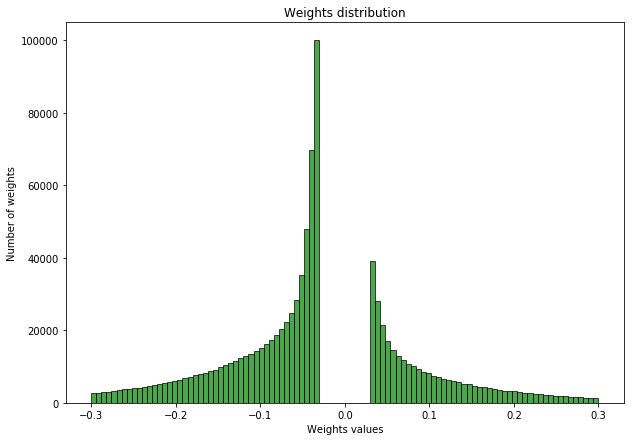

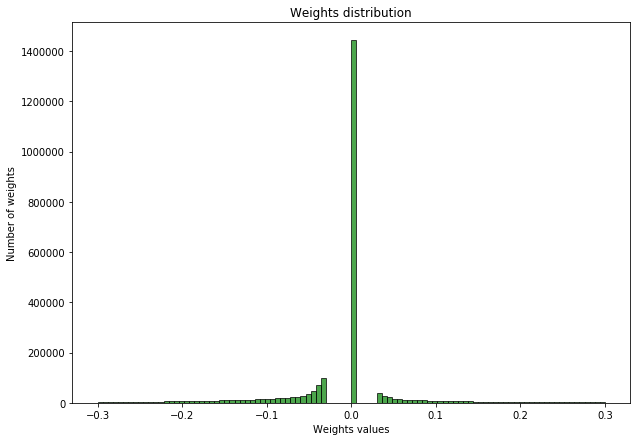

(784, 1568)
[[ 0.          0.         -0.         ... -0.          0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.03485266 -0.         -0.         ...  0.         -0.
  -0.        ]
 ...
 [ 0.         -0.          0.         ...  0.         -0.
  -0.        ]
 [-0.          0.         -0.         ...  0.          0.
  -0.        ]
 [-0.         -0.          0.         ... -0.          0.
   0.        ]]
(1568, 784)
[[-0.          0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.          0.         -0.         ... -0.          0.
   0.        ]
 [-0.03069396 -0.         -0.         ...  0.         -0.
   0.        ]
 ...
 [-0.03868391  0.         -0.         ... -0.          0.
   0.03858083]
 [-0.16713096  0.         -0.2292078  ...  0.          0.15249625
   0.10357355]
 [ 0.07498443 -0.06154744  0.04240219 ...  0.33003008  0.16474582
  -0.0694848 ]]
(784, 10)
[[ 0.07854261 -0.20239052 -0.06968176 ...  0.         -0.05495

In [23]:
tf.reset_default_graph()
batch_size = 150

n_batch = mnist.train.num_examples//batch_size

#Two placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#Nural network
with tf.variable_scope('myvar',reuse=tf.AUTO_REUSE):

    W1 = tf.get_variable(name='W1',initializer=tf.random_normal([784,1568])/100)
    W2 = tf.get_variable(name='W2',initializer=tf.random_normal([1568,784])/100)
    W3 = tf.get_variable(name='W3',initializer=tf.random_normal([784,10])/100)

    
    b1 = tf.get_variable(name= 'b1',initializer=tf.random_normal([1568])/100)
    b2 = tf.get_variable(name= 'b2',initializer=tf.random_normal([784])/100)
    b3 = tf.get_variable(name= 'b3',initializer=tf.random_normal([10])/100)



L12 = tf.nn.relu(tf.matmul(x,W1)+b1)
L23 = tf.nn.relu(tf.matmul(L12,W2)+b2)
prediction = tf.nn.softmax(tf.matmul(L23,W3)+b3)

#loss
loss = tf.reduce_mean(tf.square(y-prediction))
#Gradient decent
#train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate=0.005).minimize(loss)
#train_step = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
# Ture of false
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

saver = tf.train.Saver()

print('Number of parameters (four bytes == 1 parameter): {}.\n'.format(int(number_of_parameters(tf.trainable_variables()))))

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    # Weighs before training
    print('Weighs before training')
    for v in tf.trainable_variables():
        print(v.shape)
        print(sess.run(v))


    
    acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    print('acc',str(acc))
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
            
        print('epoch:',epoch+1)
        acc1 = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels})
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('train acc:',acc1,'acc',str(acc))
        
        
    weights = []
    
    weights.append(sess.run(W1))
    weights.append(sess.run(W2))
    weights.append(sess.run(W3))
    weights.append(sess.run(b1))
    weights.append(sess.run(b2))
    weights.append(sess.run(b3))
    #before pruning plot
    print('---------------------------------------------------')
    plot_histogram(weights,'weights_distribution_after_pruning',include_zeros=False)
    plot_histogram(weights,'weights_distribution_after_pruning',include_zeros=True)
    print('---------------------------------------------------')
    
    
    
    print('after pruning----------------------------------------------------------')
    
    for v in tf.trainable_variables():
        print(v.shape)
        print(sess.run(v))
    
    print('-----------------')
    print('-----------------')
    
    #mask
    for weight_matrix,i in zip(weights,tf.trainable_variables()):
        #print(sess.run(i))
        mask = mask_for_big_values(weight_matrix,0.03)
        #print(mask.shape)
        sess.run(i.assign(weight_matrix * mask))
    
    
    weightsp = []
    
    weightsp.append(sess.run(W1))
    weightsp.append(sess.run(W2))
    weightsp.append(sess.run(W3))
    weightsp.append(sess.run(b1))
    weightsp.append(sess.run(b2))
    weightsp.append(sess.run(b3))    
    #after pruning
    plot_histogram(weightsp,'weights_distribution_after_pruning',include_zeros=False)
    plot_histogram(weightsp,'weights_distribution_after_pruning',include_zeros=True)
        
        
    
    saver.save(sess, "Model/model.ckpt")
    for v in tf.trainable_variables():
        print(v.shape)
        print(sess.run(v))
    
        


In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt") # 注意此处路径前添加"./"
    print(sess.run(W1))
    print(sess.run(W2))
    print(sess.run(W3))
    print(sess.run(b1))
    print(sess.run(b2))
    print(sess.run(b3))

    L12p1 = tf.nn.relu(tf.matmul(x,W1)+b1)
    L23p1 = tf.nn.relu(tf.matmul(L12p1,W2)+b2)
    prediction1 = tf.nn.softmax(tf.matmul(L23p1,W3)+b3)

    correct_prediction1 = tf.equal(tf.argmax(y,1),tf.argmax(prediction1,1))
    
    accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1,tf.float32))
    accc1 = sess.run(accuracy1,feed_dict={x:mnist.train.images,y:mnist.train.labels})
    accc = sess.run(accuracy1,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    print('train accc:',accc1,'acc',str(accc))


[[ 0.          0.         -0.         ... -0.          0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.03485266 -0.         -0.         ...  0.         -0.
  -0.        ]
 ...
 [ 0.         -0.          0.         ...  0.         -0.
  -0.        ]
 [-0.          0.         -0.         ...  0.          0.
  -0.        ]
 [-0.         -0.          0.         ... -0.          0.
   0.        ]]
[[-0.          0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.          0.         -0.         ... -0.          0.
   0.        ]
 [-0.03069396 -0.         -0.         ...  0.         -0.
   0.        ]
 ...
 [-0.03868391  0.         -0.         ... -0.          0.
   0.03858083]
 [-0.16713096  0.         -0.2292078  ...  0.          0.15249625
   0.10357355]
 [ 0.07498443 -0.06154744  0.04240219 ...  0.33003008  0.16474582
  -0.0694848 ]]
[[ 0.07854261 -0.20239052 -0.06968176 ...  0.         -0.05495074
   0.24092369]
 [ 0.          

train accc: 0.89443636 acc 0.8986


In [25]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])    
with tf.variable_scope('op',reuse=tf.AUTO_REUSE):
    
    global_step = tf.get_variable(name='g',shape=[1],dtype=tf.float32,initializer=tf.constant_initializer(0.3))
with tf.Session() as sess1:
    
    saver.restore(sess1, "./Model/model.ckpt") # 注意此处路径前添加"./"
    
    #sess1.run(tf.global_variables_initializer())
    print(sess1.run(W1))
    print(sess1.run(W2))
    print(sess1.run(W3))
    print(sess1.run(b1))
    print(sess1.run(b2))
    print(sess1.run(b3))
    
    
    
    L12 = tf.nn.relu(tf.matmul(x,W1)+b1)
    L23 = tf.nn.relu(tf.matmul(L12,W2)+b2)
    prediction = tf.nn.softmax(tf.matmul(L23,W3)+b3)
    
   

    optimizer = tf.train.AdamOptimizer(learning_rate=0.25)
    loss = tf.reduce_mean(tf.square(y-prediction))
    
    grads_and_vars = optimizer.compute_gradients(loss)
    #print(grads_and_vars)
    
    
            # to the pruned weights to be zero

    grads_and_vars_sparse = []

    for grad, var in grads_and_vars:
        if 'myvar' in var.name:
            print('weights')
            small_weights = tf.greater(0.008, tf.abs(var))
            mask = tf.cast(tf.logical_not(small_weights), tf.float32)
            grad = grad * mask

        grads_and_vars_sparse.append((grad, var))
    print(grads_and_vars_sparse)
        
    train_op = optimizer.apply_gradients(grads_and_vars_sparse)
    print(train_op)
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    correct_prediction1 = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
    
    accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1,tf.float32))
    
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess1.run(train_op,feed_dict={x:batch_xs,y:batch_ys})        

        accc1 = sess1.run(accuracy1,feed_dict={x:mnist.train.images,y:mnist.train.labels})
        accc = sess1.run(accuracy1,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('epoch:',epoch+1,'train accc:',accc1,'acc',str(accc))
    print(sess1.run(W1))
    print(sess1.run(W2))
    print(sess1.run(W3))
    print(sess1.run(b1))
    print(sess1.run(b2))
    print(sess1.run(b3))
    
    weightspf = []
    
    weightspf.append(sess1.run(W1))
    weightspf.append(sess1.run(W2))
    weightspf.append(sess1.run(W3))
    weightspf.append(sess1.run(b1))
    weightspf.append(sess1.run(b2))
    weightspf.append(sess1.run(b3))    
    #after pruning
    plot_histogram(weightspf,'weights_distribution_after_pruning',include_zeros=True)
    plot_histogram(weightspf,'weights_distribution_after_pruning',include_zeros=False)

[[ 0.          0.         -0.         ... -0.          0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.03485266 -0.         -0.         ...  0.         -0.
  -0.        ]
 ...
 [ 0.         -0.          0.         ...  0.         -0.
  -0.        ]
 [-0.          0.         -0.         ...  0.          0.
  -0.        ]
 [-0.         -0.          0.         ... -0.          0.
   0.        ]]
[[-0.          0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.          0.         -0.         ... -0.          0.
   0.        ]
 [-0.03069396 -0.         -0.         ...  0.         -0.
   0.        ]
 ...
 [-0.03868391  0.         -0.         ... -0.          0.
   0.03858083]
 [-0.16713096  0.         -0.2292078  ...  0.          0.15249625
   0.10357355]
 [ 0.07498443 -0.06154744  0.04240219 ...  0.33003008  0.16474582
  -0.0694848 ]]
[[ 0.07854261 -0.20239052 -0.06968176 ...  0.         -0.05495074
   0.24092369]
 [ 0.          

weights
weights
weights
weights
weights
weights
[(<tf.Tensor 'mul:0' shape=(784, 1568) dtype=float32>, <tf.Variable 'myvar/W1:0' shape=(784, 1568) dtype=float32_ref>), (<tf.Tensor 'mul_1:0' shape=(1568, 784) dtype=float32>, <tf.Variable 'myvar/W2:0' shape=(1568, 784) dtype=float32_ref>), (<tf.Tensor 'mul_2:0' shape=(784, 10) dtype=float32>, <tf.Variable 'myvar/W3:0' shape=(784, 10) dtype=float32_ref>), (<tf.Tensor 'mul_3:0' shape=(1568,) dtype=float32>, <tf.Variable 'myvar/b1:0' shape=(1568,) dtype=float32_ref>), (<tf.Tensor 'mul_4:0' shape=(784,) dtype=float32>, <tf.Variable 'myvar/b2:0' shape=(784,) dtype=float32_ref>), (<tf.Tensor 'mul_5:0' shape=(10,) dtype=float32>, <tf.Variable 'myvar/b3:0' shape=(10,) dtype=float32_ref>), (None, <tf.Variable 'op/g:0' shape=(1,) dtype=float32_ref>)]
name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_myvar/W1/ApplyAdam"
input: "^Adam_1/update_myvar/W2/ApplyAdam"
input: "^Adam_1/update_myvar/W3/ApplyAdam"
input: "^Adam_1/update_myvar/b1/ApplyAdam"
in

FailedPreconditionError: Attempting to use uninitialized value beta2_power_1
	 [[node beta2_power_1/read (defined at <ipython-input-25-b08c7afc8c77>:47) ]]

Original stack trace for 'beta2_power_1/read':
  File "D:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "D:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "D:\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "D:\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "D:\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "D:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "D:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "D:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-b08c7afc8c77>", line 47, in <module>
    train_op = optimizer.apply_gradients(grads_and_vars_sparse)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\training\optimizer.py", line 597, in apply_gradients
    self._create_slots(var_list)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\training\adam.py", line 127, in _create_slots
    initial_value=self._beta2, name="beta2_power", colocate_with=first_var)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\training\optimizer.py", line 830, in _create_non_slot_variable
    colocate_with))
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 259, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 220, in _variable_v1_call
    shape=shape)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 198, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2511, in default_variable_creator
    shape=shape)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 263, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1568, in __init__
    shape=shape)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1755, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 86, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4996, in identity
    "Identity", input=input, name=name)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
